In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('The shape of train dataset: {}'.format(train.shape))
print('The shape of test dataset: {}'.format(test.shape))

The shape of train dataset: (112500, 11)
The shape of test dataset: (37500, 10)


In [4]:
columns_list = ['bad_client', 'lines', 'age', 'behavior_30_59', 'debt_ratio', 'income', 'trusts_number', 'behavior_90', 'property', 'behavior_60_89', 'family']
train.columns = columns_list

In [5]:
columns_list = ['lines', 'age', 'behavior_30_59', 'debt_ratio', 'income', 'trusts_number', 'behavior_90', 'property', 'behavior_60_89', 'family']
test.columns = columns_list

<h1>Train dataset</h1>

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
ex.pie(train, names='bad_client', title='Propotion Of bad client', height=500, width=500)

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.lines, name = 'Lines Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.lines, name = 'Lines Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of lines")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.age, name = 'Age Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.age, name = 'Age Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the customers age")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.behavior_30_59 , name = 'behavior 30 - 59  Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.behavior_30_59 , name = 'behavior 30 - 59  Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the behavior 30 - 59")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.debt_ratio, name = 'debt_ratio Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.debt_ratio , name = 'debt_ratio Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the debt_ratio")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.income, name = 'income Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.income , name = 'income Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the income")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.trusts_number, name = 'trusts number Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.trusts_number , name = 'trusts number Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the trusts number")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.behavior_90, name = 'behavior 90 Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.behavior_90 , name = 'behavior 90 Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the behavior 90")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.property, name = 'property Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.property , name = 'property Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the property")
fig.show()

In [ ]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = train.family, name = 'family Box Plot', boxmean=True)
tr2 = go.Histogram(x = train.family , name = 'family Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 500, width = 1000, title_text = "Distribution of the family members")
fig.show()

In [ ]:
ex.pie(train, names = 'family', title='Propotion Of family member', height=500, width=500)

In [6]:
train.family = train.family.fillna(0)

In [7]:
train.income = train.income.fillna(train.income.mean())

In [8]:
train.isnull().sum()

bad_client        0
lines             0
age               0
behavior_30_59    0
debt_ratio        0
income            0
trusts_number     0
behavior_90       0
property          0
behavior_60_89    0
family            0
dtype: int64

<h1>Test dataset</h1>

In [9]:
test.family = test.family.fillna(0)
test.income = test.income.fillna(test.income.mean())

In [10]:
test.isnull().sum()

lines             0
age               0
behavior_30_59    0
debt_ratio        0
income            0
trusts_number     0
behavior_90       0
property          0
behavior_60_89    0
family            0
dtype: int64

<h3>Data spliting</h3>

In [11]:
X, y = train.drop(columns = 'bad_client', axis=1), train.bad_client

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h2>Modeling without data preparation data and tuning hyperparametrs</h2>

In [12]:
clf = RandomForestClassifier(random_state=0, n_jobs=2)

In [13]:
f1_cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
accuracy_cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
roc_auc_cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')

In [14]:
print('The f1 score on cross validation: {}'.format(f1_cross_val_scores.mean()))
print('The accuracy score on cross validation: {}'.format(accuracy_cross_val_scores.mean()))
print('The roc_auc on cross validation: {}'.format(roc_auc_cross_val_scores.mean()))

The f1 score on cross validation: 0.2761538766738747
The accuracy score on cross validation: 0.9344118518518517
The roc_auc on cross validation: 0.8370871880766406


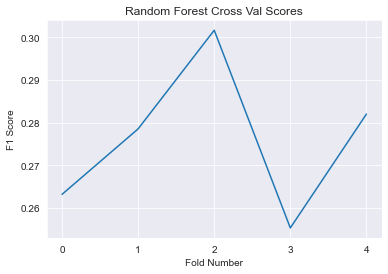

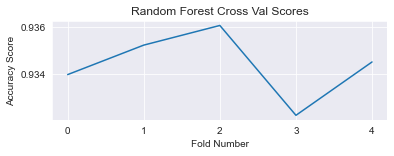

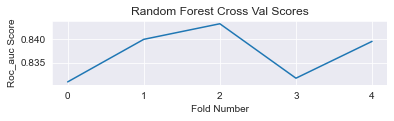

In [15]:
plt.subplot(1, 1, 1)
ax = sns.lineplot(x=range(0, len(f1_cross_val_scores)), y=f1_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

plt.subplot(2, 1, 1)
ax = sns.lineplot(x=range(0, len(accuracy_cross_val_scores)), y=accuracy_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(accuracy_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('Accuracy Score')
plt.show()

plt.subplot(3, 1, 1)
ax = sns.lineplot(x=range(0, len(roc_auc_cross_val_scores)), y=roc_auc_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(roc_auc_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('Roc_auc Score')
plt.show()

<h1>Data preparation</h1>

<h4>Oversampling and undersampling</h4>

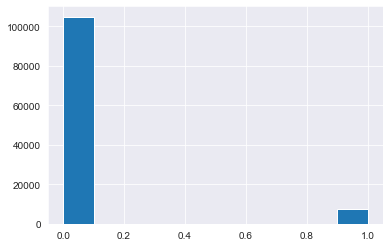

In [16]:
train.bad_client.hist()

In [17]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = steps)

X_res, y_res = pipeline.fit_resample(X, y)

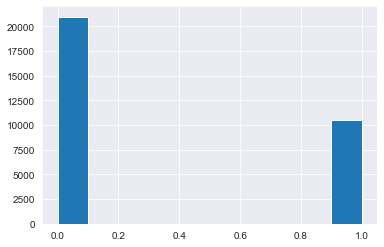

In [18]:
y_res.hist()

In [ ]:
res = SMOTEENN()

steps = [('res', res)]
pipeline = Pipeline(steps = steps)

X_res_teenn, y_res_teenn = pipeline.fit_resample(X, y)

In [ ]:
y_res_teenn.hist()

In [ ]:
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=2)
print('Mean ROC AUC: %.3f' % scores.mean())

In [ ]:
model = RandomForestClassifier()
res = SMOTEENN()
steps = [('res', res), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=2)
print('Mean ROC AUC: %.3f' % scores.mean())

<h4>Outlier detection</h4>

In [19]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=0)

In [20]:
print(X_train_res.shape, y_train_res.shape)

(23613, 10) (23613,)


In [ ]:
model = RandomForestClassifier(random_state=0, n_jobs=2)
model.fit(X_train_res, y_train_res)
yhat = model.predict(X_test_res)
mae = mean_absolute_error(y_test_res, yhat)
print('MAE: %.3f' % mae)

In [ ]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_res)

mask = yhat != -1
X_train_res, y_train_res = X_train_res.iloc[mask, :], y_train_res.iloc[mask]

print(X_train_res.shape, y_train_res.shape)

In [ ]:
model = RandomForestClassifier(random_state=0, n_jobs=2)
model.fit(X_train_res, y_train_res)
yhat = model.predict(X_test_res)
mae = mean_absolute_error(y_test_res, yhat)
print('MAE: %.3f' % mae)

In [21]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_res)

mask = yhat != -1

print('Before: {}'.format(X_res.shape, X_res.shape))
X_res, y_res = X_res.iloc[mask, :], y_res.iloc[mask]
print('After: {}'.format(X_res.shape, X_res.shape))

Before: (31485, 10)
After: (28336, 10)


<h4>Normalization</h4>

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(RandomForestClassifier(random_state=0, n_jobs=2), X_res, y_res, scoring='accuracy', cv=cv, n_jobs=2, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), np.std(n_scores)))

In [ ]:
trans = MinMaxScaler()
model = RandomForestClassifier(random_state=0, n_jobs=2)
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), np.std(n_scores)))

In [ ]:
trans = StandardScaler()
model = RandomForestClassifier(random_state=0, n_jobs=2)
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), np.std(n_scores)))

In [26]:
trans = StandardScaler()

X_res_trans = trans.fit_transform(X_res)
test_trans = trans.fit_transform(test)

X_res_trans = pd.DataFrame(X_res_trans)
test_trans = pd.DataFrame(test_trans)

<h1>Modeling w/ preparated data</h1>

In [22]:
pipe_pre = Pipeline(steps =[("RF", RandomForestClassifier(n_jobs=2, random_state=0))])
pipe_after = Pipeline(steps =[('scale', StandardScaler()), ("RF", RandomForestClassifier(n_jobs=2, random_state=0)) ])

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores_pre = cross_val_score(pipe_pre, X, y, scoring='roc_auc', cv=cv, n_jobs=2)
scores_after = cross_val_score(pipe_after, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=2)

print('Before mean ROC AUC: %.3f' % scores_pre.mean())
print('After mean ROC AUC: %.3f' % scores_after.mean())

Before mean ROC AUC: 0.838
After mean ROC AUC: 0.856


<h1>Tuning hyperparametrs</h1>

<h4>RandomForest</h4>

In [ ]:
model = RandomForestClassifier(random_state=0, n_jobs=2)

n_estimators = [100, 150, 180, 200]
max_features = ['sqrt', 'log2', 'auto']
max_depth = [2, 4, 6, 8]

grid = dict(n_estimators=n_estimators, 
            max_features=max_features, 
            max_depth = max_depth, 
           )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_res, y_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_est = grid_result.best_estimator_

In [ ]:
result = best_est.predict_proba(test)[:, 1]

In [ ]:
pd.DataFrame({'id': np.arange(37500), 'a' : result}).to_csv('solution.csv', index=False)

<h4>XGBoost</h4>

In [35]:
xgb = XGBClassifier(n_jobs = 2) 
 
param_grid = {
                  'n_estimators'     : [100, 150, 200],
                  "learning_rate"    : [0.05, 0.1, 0.2, 0.3],
                  "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5],
                  "colsample_bytree" : [0.2, 0.4, 0.5, 0.6, 0.8, 1],
                  'max_depth'        : [3, 5, 6, 8],
                  'gamma'            : [0, 0.2, 0.4, 0.6, 1],
                  'min_child_weight' : [2, 4, 6, 9],
                  'subsample'        : [0.2, 0.5, 0.8, 1],
                  'reg_alpha'        : [0, 0.001, 0.005, 0.1, 0.5, 1],
                  'reg_lambda'       : [1, 1.2, 1.5, 1.8, 2],
                  'scale_pos_weight' : [0, 0.001, 0.5, 1]
              }

xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions = param_grid)

xgb_result = xgb_randomgrid.fit(X_res_trans, y_res)

print("Best: %f using %s" % (xgb_result.best_score_, xgb_result.best_params_))
means = xgb_result.cv_results_['mean_test_score']
stds = xgb_result.cv_results_['std_test_score']
params = xgb_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820618 using {'subsample': 1, 'scale_pos_weight': 1, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 150, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.2}
0.820618 (0.031808) with: {'subsample': 1, 'scale_pos_weight': 1, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 150, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.2}
0.707933 (0.000050) with: {'subsample': 0.2, 'scale_pos_weight': 0.001, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1}
0.807525 (0.041534) with: {'subsample': 1, 'scale_pos_weight': 0.5, 'reg_lambda': 1.2, 'reg_alpha': 0.005, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
0.707933 (0.000050) with: {'subsample': 1, 'scale_pos_weight': 0.001, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimat

In [37]:
best_est = xgb_randomgrid.best_estimator_

In [38]:
result = best_est.predict_proba(test_trans)[:, 1]

In [39]:
pd.DataFrame({'id': np.arange(37500), 'a' : result}).to_csv('solution.csv', index=False)

<h4>LogisticRegression</h4>

In [46]:
pipe_reg = Pipeline(steps =[('scale', StandardScaler()), ('reg', LogisticRegression(n_jobs = 4)) ])

param_grid = {
                'reg__solver'   : ['liblinear'],
                'reg__penalty' : ['l1', 'l2'],
                'reg__C'        : [100, 10, 1.0, 0.1, 0.01]               
              }

reg_randomgrid = RandomizedSearchCV(pipe_reg, param_distributions = param_grid, cv = 5)

reg_result = reg_randomgrid.fit(X_res, y_res)

print("Best: %f using %s" % (reg_result.best_score_, reg_result.best_params_))
means = reg_result.cv_results_['mean_test_score']
stds = reg_result.cv_results_['std_test_score']
params = reg_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
E:\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Best: 0.771421 using {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 0.1}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 100}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l2', 'reg__C': 100}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 10}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l2', 'reg__C': 10}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 1.0}
0.771386 (0.012940) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l2', 'reg__C': 1.0}
0.771421 (0.013085) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 0.1}
0.771386 (0.013033) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l2', 'reg__C': 0.1}
0.770927 (0.012816) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l1', 'reg__C': 0.01}
0.771280 (0.013353) with: {'reg__solver': 'liblinear', 'reg__penalty': 'l2', 'reg__C':

In [49]:
best_est = reg_randomgrid.best_estimator_

In [51]:
result = best_est.predict_proba(test_trans)[:, 1]

In [52]:
pd.DataFrame({'id': np.arange(37500), 'a' : result}).to_csv('solution.csv', index=False)